# PDA Data Science Project

## Predicting Employee Turnover with Machine Learning and Generating Visualizations

## 1. Introduction

* Group Project Number: Group1
* Team Members: Jaime Alexis GarciaGarcia, Jamie Renwick, Safoora Kappukkuth Pottammal

Workplaces are always changing, and one big challenge for companies is figuring out who might leave their job soon. That's where our project comes in. We're using the power of computers and machine learning to predict if employees will leave within the next two years. We're working with data from 2012 to 2018, studying details from 4653 employees, like their education, when they joined, where they work, Payment Tier, their age, gender, work history, and most importantly, whether they stayed or left. 

Looking at data from different years gives us a special chance to see how things have changed over time. Knowing when people might leave is crucial for companies trying to manage their teams well. 

In our project, we're going deep into the data, using smart computer programs to find out which factors are linked to employees leaving. Our goal is to give companies a heads-up about potential turnover so they can take action to keep their team strong and successful. 

We will explore the details of predicting employee turnover, digging into the past to find insights that go beyond the years 2012 to 2018. 


## 2. Data collection

## 3. Data Description

### Libraries

In [2]:
# installing libraries
# pip install matplotlib

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset file

In [4]:
df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


## 4. Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


### Null Values Analysis

In [6]:
df.isna().sum().sort_values(ascending = False)

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

### EDA Categoric Variables

In [7]:
def categoric_eda_graphs(cat):

    # rows needed
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    # Graph design
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    # flat graph
    ax = ax.flat

    # adding graphs for each variable
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

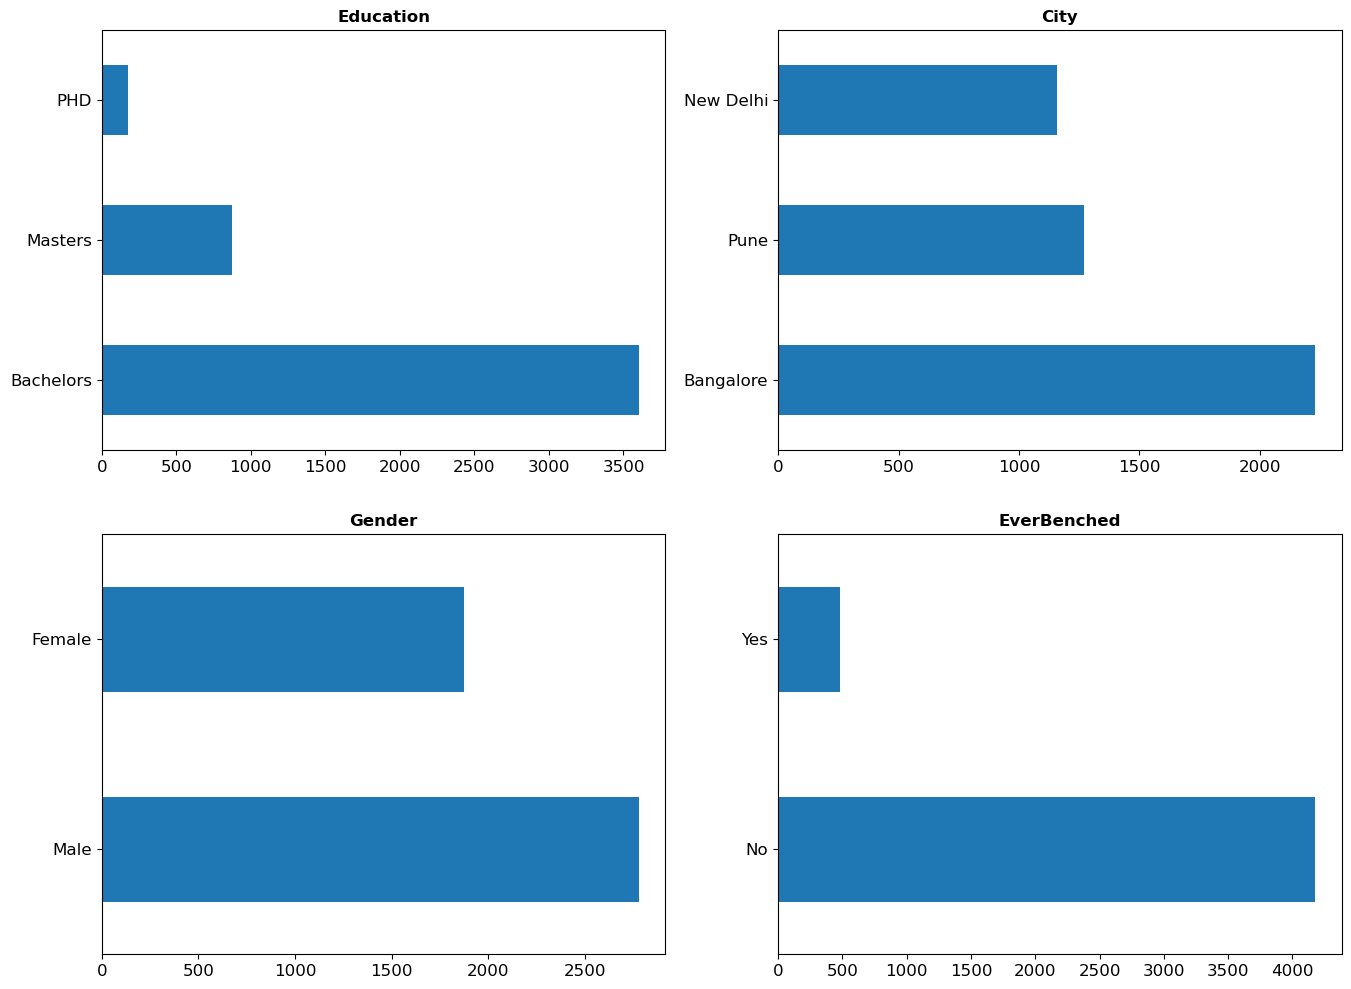

In [8]:
categoric_eda_graphs(df.select_dtypes('O'))

In [9]:
def estadistics_cont(num):
    # describe
    estadistics = num.describe().T
    # Adding median
    estadistics['median'] = num.median()
    # We rearrange the columns so that the median is next to the mean
    estadistics = estadistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    # return
    return(estadistics)

In [10]:
estadistics_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,2015.0,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,3.0,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,28.0,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,3.0,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.0,0.475047,0.0,0.0,0.0,1.0,1.0


### Turnover rate

In [18]:
df['LeaveOrNot_Label'] = df['LeaveOrNot'].map({0: 'NO', 1: 'YES'})
turnover_rate = df['LeaveOrNot_Label'].value_counts(normalize=True) * 100

turnover_rate

NO     65.613583
YES    34.386417
Name: LeaveOrNot_Label, dtype: float64

### Is there a typical profile of an employee who leaves the company?

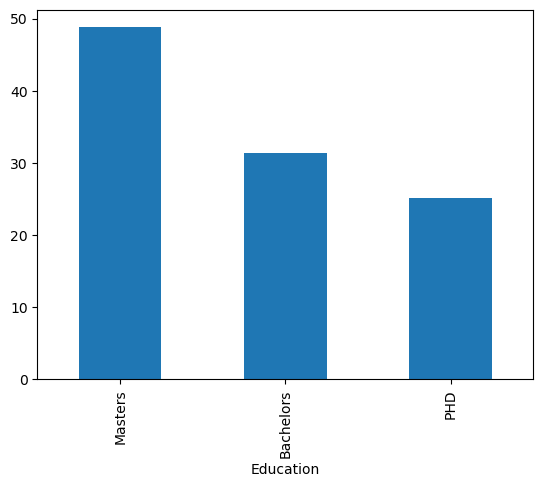

In [19]:
# Analysis by Education
temp = df.groupby('Education').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

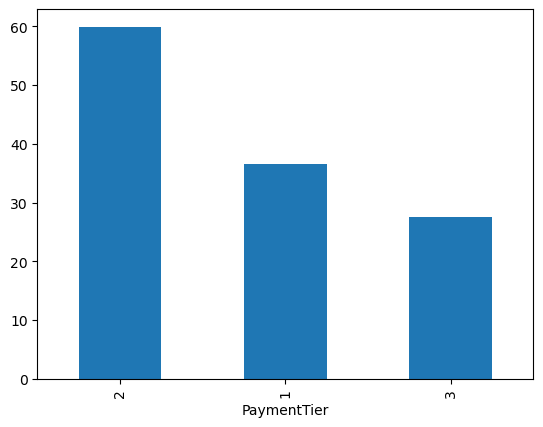

In [20]:
# Analysis by PaymentTier
temp = df.groupby('PaymentTier').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

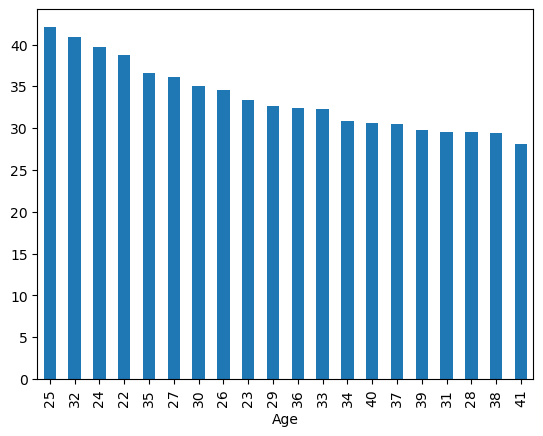

In [21]:
# Analysis by Age
temp = df.groupby('Age').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

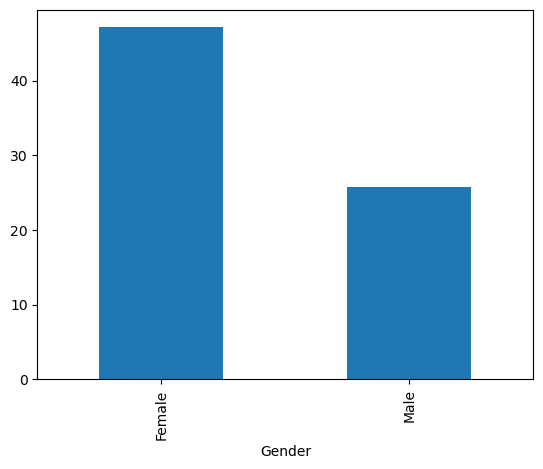

In [22]:
# Analysis by Gender
temp = df.groupby('Gender').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

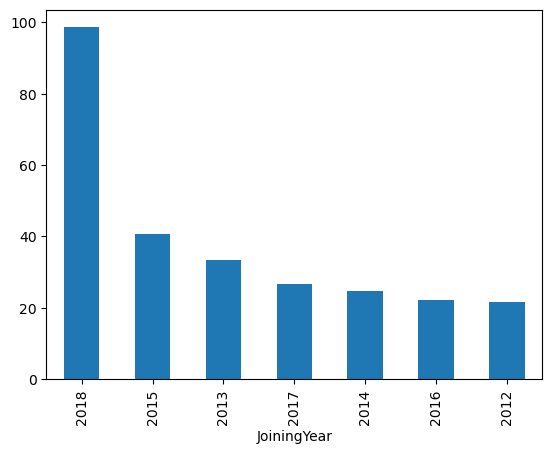

In [23]:
# Analysis by JoiningYear
temp = df.groupby('JoiningYear').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

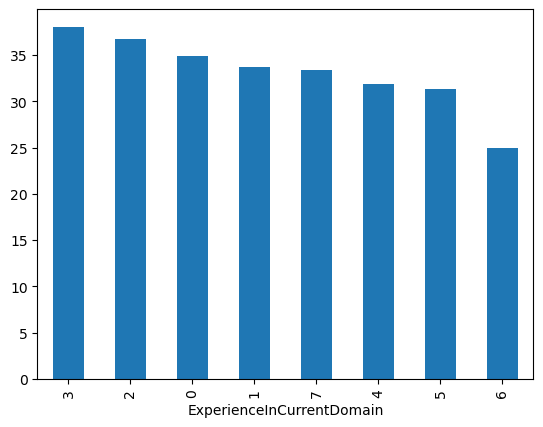

In [25]:
# Analysis by ExperienceInCurrentDomain
temp = df.groupby('ExperienceInCurrentDomain').LeaveOrNot.mean().sort_values(ascending = False) * 100
temp.plot.bar();

## 6. Model Selection